In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#正常显示中文
import matplotlib
font_list=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文

In [51]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
sb.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sb.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定 

In [60]:
path = r'C:\Users\Administrator\Desktop\上线金融项目分析\供应链金融上线项目818.xlsx'

In [61]:
df = pd.read_excel(path,sheet_name='周分析')

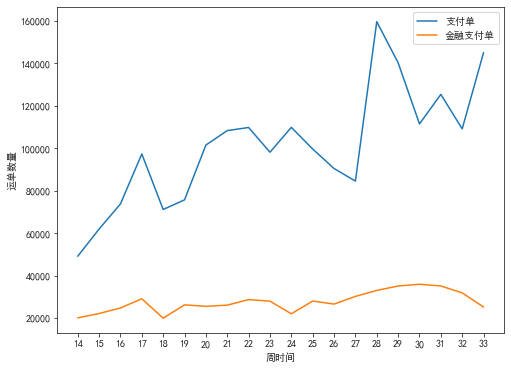

In [52]:
#周维度-所有项目的周维度数据呈现
#支付单—金融支付单
fig, ax = plt.subplots(figsize=(8,6));
df.plot('周时间', '支付单', legend=True, ax=ax);
df.plot('周时间', '金融支付单', legend=True, ax=ax);
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
ax.legend(labels=['支付单', '金融支付单']);
plt.ylabel('运单数量');

In [55]:
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']# 支持中文
plt.rcParams['axes.unicode_minus'] = False #正常显示字符

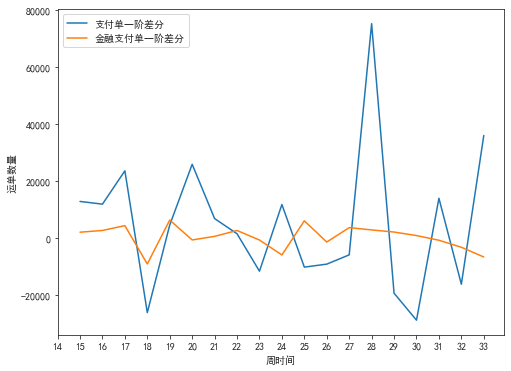

In [57]:
df['支付单一阶差分'] = df['支付单'].diff(1)
df['金融支付单一阶差分'] = df['金融支付单'].diff(1)
fig, ax = plt.subplots(figsize=(8,6));
df.plot('周时间', '支付单一阶差分', legend=True, ax=ax);
df.plot('周时间', '金融支付单一阶差分', legend=True, ax=ax);
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
ax.legend(labels=['支付单一阶差分', '金融支付单一阶差分']);
plt.ylabel('运单数量');

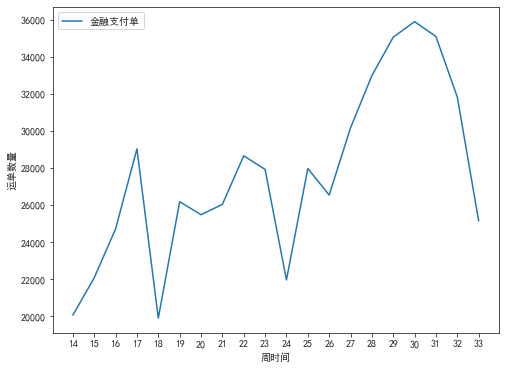

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
df.plot('周时间', '金融支付单', legend=True, ax=ax)
ax.legend(labels=[ '金融支付单'])
plt.ylabel('运单数量');

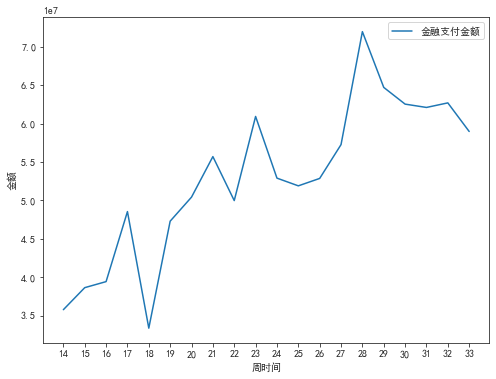

In [19]:
#支付单—金融支付单
fig, ax = plt.subplots(figsize=(8,6))
df.plot('周时间', '金融支付金额', legend=True, ax=ax)
ax.legend(labels=['金融支付金额'])
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
plt.ylabel('金额');

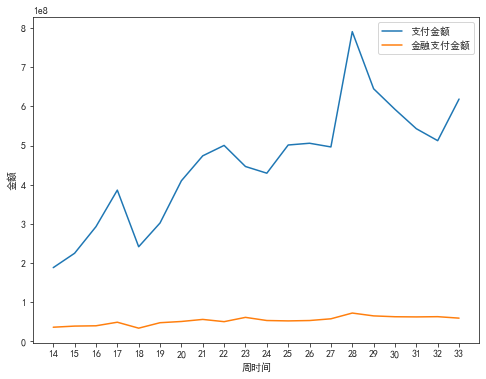

In [24]:
fig, ax = plt.subplots(figsize=(8,6));
df.plot('周时间', '支付金额', legend=True, ax=ax);
df.plot('周时间', '金融支付金额', legend=True, ax=ax);
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
ax.legend(labels=['支付金额', '金融支付金额']);
plt.ylabel('金额');

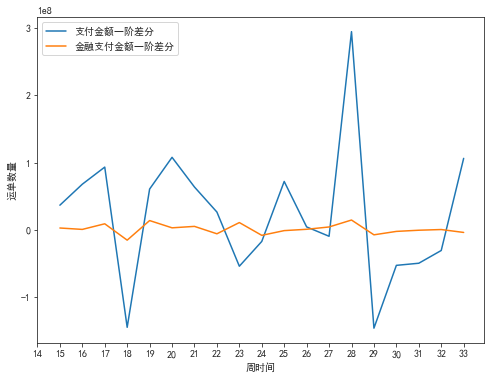

In [58]:
df['支付金额一阶差分'] = df['支付金额'].diff(1)
df['金融支付金额一阶差分'] = df['金融支付金额'].diff(1)
fig, ax = plt.subplots(figsize=(8,6));
df.plot('周时间', '支付金额一阶差分', legend=True, ax=ax);
df.plot('周时间', '金融支付金额一阶差分', legend=True, ax=ax);
plt.xticks([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]);
ax.legend(labels=['支付金额一阶差分', '金融支付金额一阶差分']);
plt.ylabel('运单数量');

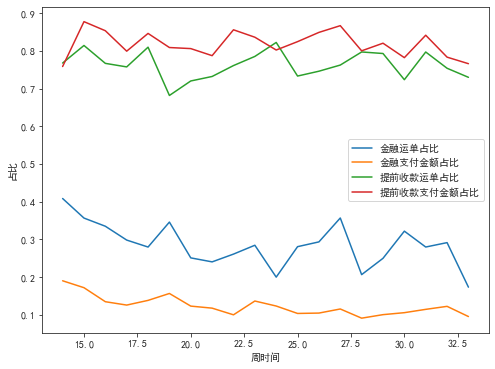

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

df.plot('周时间', '金融运单占比', legend=True, ax=ax)
df.plot('周时间', '金融支付金额占比', legend=True, ax=ax)
df.plot('周时间', '提前收款运单占比', legend=True, ax=ax)
df.plot('周时间', '提前收款支付金额占比', legend=True, ax=ax)
ax.legend(labels=['金融运单占比', '金融支付金额占比', '提前收款运单占比', '提前收款支付金额占比'])
plt.ylabel('占比');

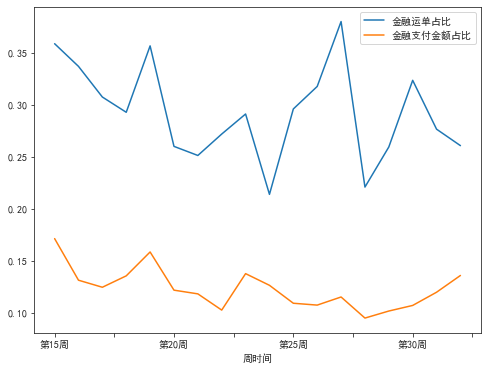

In [87]:
fig, ax = plt.subplots(figsize=(8,6))

df.plot('周时间', '金融运单占比', legend=True, ax=ax)
df.plot('周时间', '金融支付金额占比', legend=True, ax=ax)
ax.legend(labels=['金融运单占比', '金融支付金额占比'])

In [39]:
#每个数据维度的斜率
idxl = []
for column in ['支付单','金融支付单','金融支付金额','支付金额','金融运单占比','金融支付金额占比','提前收款运单占比','提前收款支付金额占比']:
    c =df.loc[:,column]
    dfi = df.sort_values(by = ['周时间'])
    reg.fit (np.array(dfi['周时间']).reshape(-1,1),np.array(c).reshape(-1,1))
    idxl.append([column,float(reg.coef_[0]),float(reg.intercept_[0])])#显示所有行

In [43]:
pd.DataFrame(idxl,columns=['维度','斜率','截距']) 

,维度,斜率,截距
0,支付单,3.665729e+03,1.496473e+04
1,金融支付单,5.728759e+02,1.416787e+04
2,金融支付金额,1.482037e+06,1.807184e+07
3,支付金额,2.188636e+07,-5.920566e+07
4,金融运单占比,-5.039079e-03,4.041484e-01
5,金融支付金额占比,-3.262430e-03,2.001364e-01
6,提前收款运单占比,-4.233788e-04,7.730450e-01
7,提前收款支付金额占比,-1.217854e-03,8.472746e-01


In [45]:
#'金融运单占比','金融支付金额占比','提前收款运单占比','提前收款支付金额占比'四个维度占比的均值和方差
idx11 = []
for i in ['金融运单占比','金融支付金额占比','提前收款运单占比','提前收款支付金额占比']:
    smean = np.mean(df.loc[:,i])
    bzc = np.std(df.loc[:,i])
    sh = bzc/smean
    idx11.append([i,float(smean),float(bzc),float(sh)])#显示所有行    

In [47]:
pd.DataFrame(idx11,columns=['维度','平均值','方差','离散系数']) 

,维度,平均值,方差,离散系数
0,金融运单占比,0.285730,0.056720,0.198511
1,金融支付金额占比,0.123469,0.025111,0.203375
2,提前收款运单占比,0.763096,0.035683,0.046761
3,提前收款支付金额占比,0.818655,0.033290,0.040664


In [ ]:
QIT 

In [ ]:
# 重新导入表格

In [77]:
df = pd.read_excel(path,sheet_name='162',dtype = {'供应链金融开通时间':'datetime64','供应链金融激活时间':'datetime64'})

In [78]:
sx = df[df['供应链金融激活时间'].notnull()]
sx['上线周期'] = sx['供应链金融激活时间'] - sx['供应链金融开通时间']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


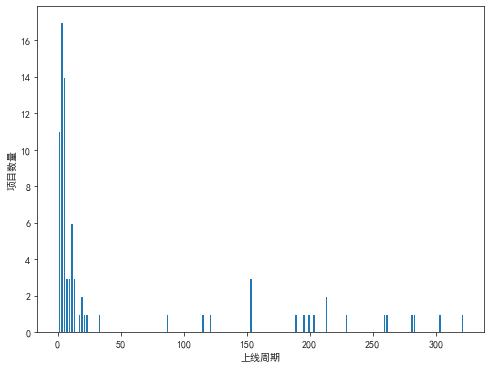

In [79]:
#上线周期直方图分布
log_binsize = 2
bins = np.arange(0, sx['上线周期'].dt.days.max()+log_binsize, log_binsize)
plt.figure(figsize=[8, 6])
plt.hist(sx['上线周期'].dt.days,bins = bins);
plt.xlabel('上线周期');
plt.ylabel('项目数量');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


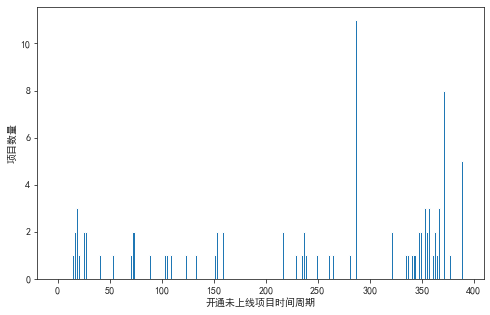

In [80]:
import datetime
#now = datetime.datetime.now()
delta = datetime.timedelta(days=7)
sx['未上线周期'] =(datetime.datetime(2020,8,18)-sx['供应链金融开通时间']).dt.days
#未上线项目周期直方图分布
log_binsize = 2
bins = np.arange(0, sx['未上线周期'].max()+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(sx['未上线周期'],bins = bins);
plt.xlabel('开通未上线项目时间周期');
plt.ylabel('项目数量');

In [81]:
df['金融方案'].value_counts()

到付2        57
预付金_到付2    53
预付金        45
供应链金融外协     2
预付金_到付1     1
预付金+外协      1
到付2+外协      1
Name: 金融方案, dtype: int64

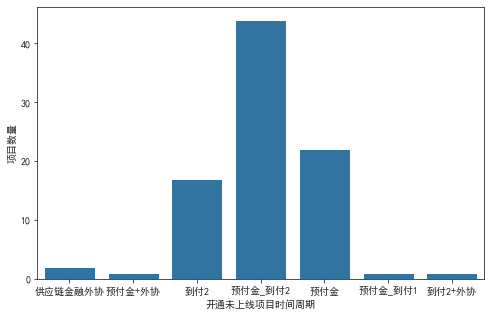

In [82]:
#金融方案直方图分布
default_color= sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = sx, x = '金融方案', color = default_color);
plt.xlabel('开通未上线项目时间周期');
plt.ylabel('项目数量');

## 各个项目数据比较

In [107]:
df = pd.read_excel(path,sheet_name='项目信息',dtype = {'供应链金融开通时间':'datetime64','供应链金融激活时间':'datetime64'})

In [84]:
df.columns

Index(['集团', '受票方', '企业ID', '企业名称', '最近建单时间', '首次建单时间', '供应链金融开通时间',
       '供应链金融激活时间', '供应链金融状态', '新企业ID', '支付单', '金融支付单', '到付金融支付单', '金融支付金额',
       '支付金额', '预付金使用金额', '到付金使用金额', '提前收款运单数', '司机提前收款金额', '金融运单占比',
       '金融支付金额占比', '提前收款运单占比', '提前收款支付金额占比', '长途单', '金融长途单', '新企业ID.1', '支付周',
       '金融支付周期', '非金融支付周期', 'AVG(里程)', '司机数', '本人收款司机数', '熟司机数', '数据起始时间',
       '数据结束时间', '天数判断条件', '天数', '平均支付金额', '平均金融支付金额', '长途占比', '金融长途占比',
       '熟司机占比', '本人收款司机占比', '平均司机数量'],
      dtype='object')

In [113]:
plt.rcParams['font.sans-serif']=['SimHei']# 支持中文
plt.rcParams['axes.unicode_minus'] = False #正常显示字符

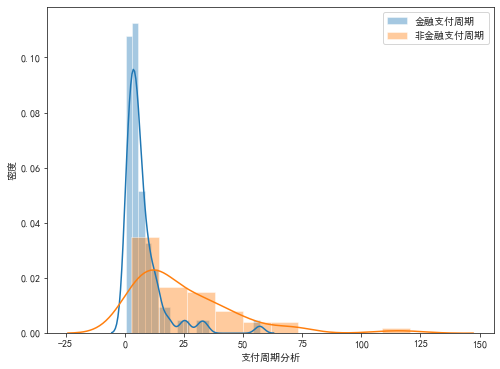

In [85]:
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['金融支付周期'])
sb.distplot(df['非金融支付周期'])
ax.legend(labels=['金融支付周期', '非金融支付周期'])
plt.xlabel('支付周期分析')
plt.ylabel('密度')
plt.show()

In [193]:
bfw = 0.20
smean = np.mean(df['非金融支付周期'])
squantile1 = np.quantile(df['非金融支付周期'],0.5)
squantile = np.quantile(df['非金融支付周期'],bfw)
bzc = np.std(df['非金融支付周期'])
smean,squantile1,squantile,bzc,bzc/smean

(25.1159897095614, nan, nan, 22.923100051725392, 0.912689498475101)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([37., 13., 16.,  6.,  4.,  4.,  0.,  0.,  1.,  1.]),
 array([  2.8629501 ,  14.75596242,  26.64897474,  38.54198705,
         50.43499937,  62.32801169,  74.221024  ,  86.11403632,
         98.00704864, 109.90006096, 121.79307327]),
 <a list of 10 Patch objects>)

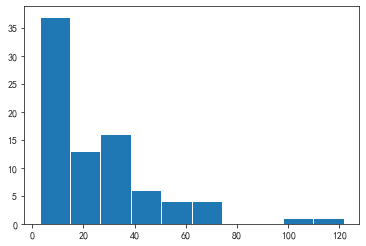

In [194]:
plt.hist(df['非金融支付周期'])

In [178]:
np.percentile(df['非金融支付周期'],2.5),np.percentile(df['非金融支付周期'],97.5)

(nan, nan)

In [ ]:
Index(['集团', '受票方', '企业ID', '企业名称', '供应链金融状态', '是否交付', '上线周期', '支付周期',
       '金融支付周期', '非金融支付周期', '里程', '司机数', '本人收款司机数', '金融运单占比', '金融支付金额占比',
       '提前收款运单占比', '提前收款支付金额占比', '平均支付金额', '平均金融支付金额'],
      dtype='object')

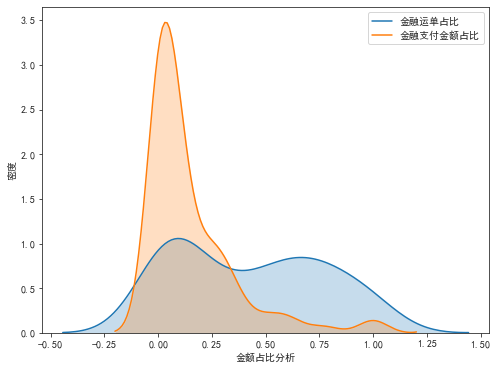

In [203]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.kdeplot(df['金融运单占比'],label='金融运单占比',shade=True)
sb.kdeplot(df['金融支付金额占比'],label='金融支付金额占比',shade=True)
plt.xlabel('金额占比分析')
plt.ylabel('密度')
plt.show()

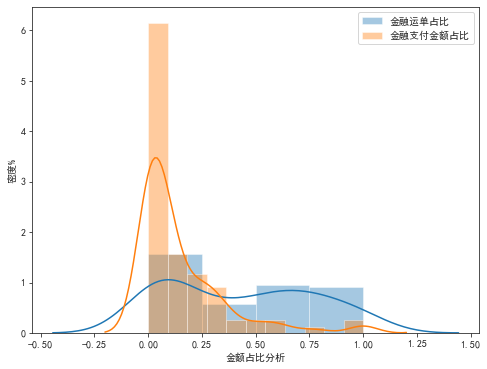

In [242]:

import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['金融运单占比'])
sb.distplot(df['金融支付金额占比'])
ax.legend(labels=['金融运单占比', '金融支付金额占比'])
plt.xlabel('金额占比分析')
plt.ylabel('密度%')
plt.show()

In [86]:
idx11 = []
for i in [ '金融运单占比','金融支付金额占比', '提前收款运单占比', '提前收款支付金额占比','金融支付周期', '非金融支付周期',  '平均支付金额', '平均金融支付金额', '长途占比', '金融长途占比','熟司机占比','本人收款司机占比']:
    smean = np.mean(df.loc[:,i])
    bzc = np.std(df.loc[:,i])
    sh = bzc/smean
    idx11.append([i,float(smean),float(bzc),float(sh)])#显示所有行   

In [87]:
pd.DataFrame(idx11,columns=['维度','平均值','方差','离散系数']) 

,维度,平均值,方差,离散系数
0,金融运单占比,0.421018,0.333350,0.791770
1,金融支付金额占比,0.141586,0.183332,1.294845
2,提前收款运单占比,0.756075,0.267891,0.354319
3,提前收款支付金额占比,0.779386,0.254145,0.326083
4,金融支付周期,7.472691,8.661569,1.159096
5,非金融支付周期,25.105810,22.380196,0.891435
6,平均支付金额,53053.264447,174371.697670,3.286729
7,平均金融支付金额,3652.181519,8944.624361,2.449118
8,长途占比,0.716825,0.312107,0.435402
9,金融长途占比,0.802442,0.306532,0.381999


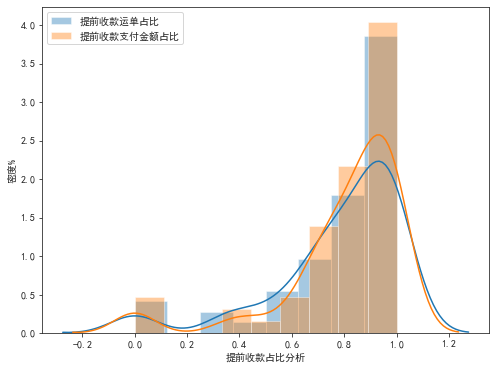

In [243]:
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['提前收款运单占比'])
sb.distplot(df['提前收款支付金额占比'])
ax.legend(labels=['提前收款运单占比', '提前收款支付金额占比'])
plt.xlabel('提前收款占比分析')
plt.ylabel('密度%')
plt.show()

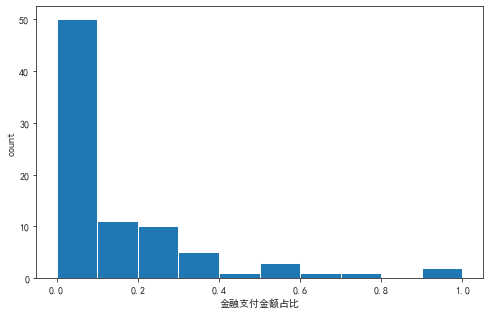

In [201]:
#binsize = 1
#bins = np.arange(df['金融运单占比'].min(), df['金融运单占比'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df,  x = '金融支付金额占比',)
plt.xlabel(u'金融支付金额占比');
plt.ylabel(u'count');

plt.show()

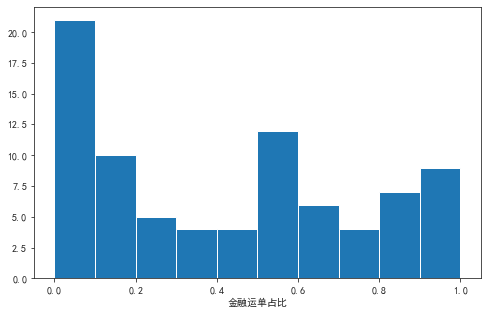

In [143]:
#binsize = 1
#bins = np.arange(df['金融运单占比'].min(), df['金融运单占比'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df,  x = '金融运单占比',)
plt.xlabel(u'金融运单占比');
plt.show()

In [ ]:
平均支付金额

In [144]:
df['平均支付金额'].min(),df['平均支付金额'].max()

(170.45092680533872, 1497179.6606250003)

(array([78.,  6.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0.        ,  6777.09980919, 13554.19961839, 20331.29942758,
        27108.39923677, 33885.49904596, 40662.59885516, 47439.69866435,
        54216.79847354, 60993.89828274, 67770.99809193]),
 <a list of 10 Patch objects>)

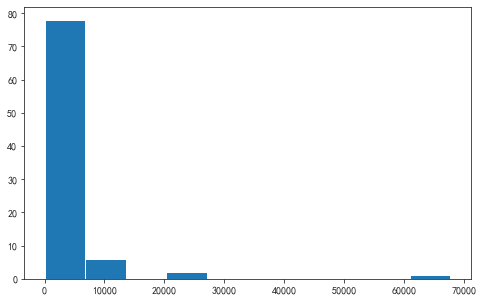

In [206]:
#bins = bins
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x = '平均金融支付金额')
#plt.xlim(([0,1000000]))

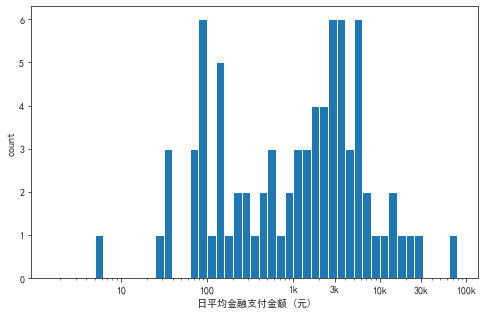

In [88]:
log_binsize = 0.1
bins = 10 ** np.arange(0.2, np.log10(df['平均金融支付金额'].max())+log_binsize, log_binsize)

#bins = bins
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x ='平均金融支付金额',bins = bins)
plt.xscale('log')
plt.xticks([10,1e2, 1e3, 3e3, 1e4, 3e4, 1e5], [10,100,'1k','3k','10k', '30k', '100k'])
plt.xlabel(u'日平均金融支付金额 (元)');
plt.ylabel(u'count');
plt.show()

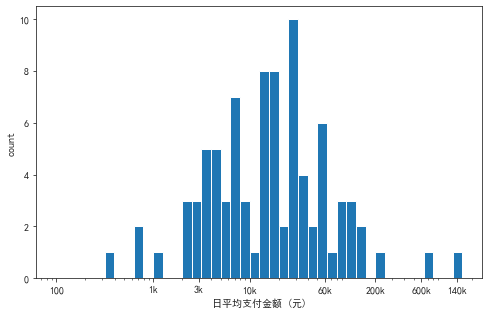

In [89]:
log_binsize = 0.1
bins = 10 ** np.arange(2, np.log10(df['平均支付金额'].max())+log_binsize, log_binsize)

#bins = bins
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x ='平均支付金额',bins = bins)
plt.xscale('log')
plt.xticks([1e2, 1e3, 3e3, 1e4, 6e4, 2e5, 6e5, 14e5], [100,'1k','3k','10k', '60k', '200k', '600k','140k'])
plt.xlabel(u'日平均支付金额 (元)');
plt.ylabel(u'count');
plt.show()

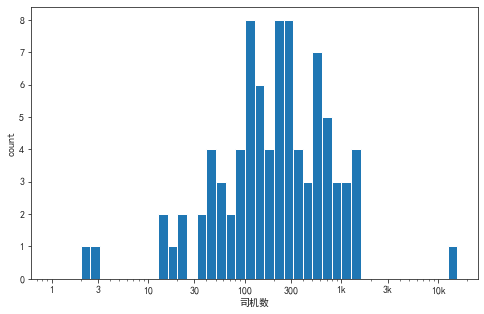

In [90]:

log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['司机数'].max())+log_binsize, log_binsize)

#bins = bins
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x ='司机数',bins = bins)
plt.xscale('log')
plt.xticks([1,3,1e1,3e1,1e2,3e2,1e3, 3e3,1e4], [1,3,10,30,100,300,'1k','3k','10k'])
plt.xlabel(u'司机数');
plt.ylabel(u'count');
plt.show()

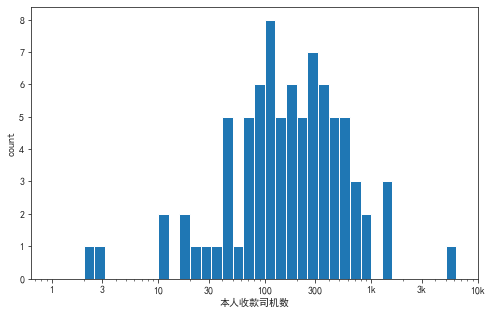

In [240]:

log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['本人收款司机数'].max())+log_binsize, log_binsize)

#bins = bins
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x ='本人收款司机数',bins = bins)
plt.xscale('log')
plt.xticks([1,3,1e1,3e1,1e2,3e2,1e3, 3e3,1e4], [1,3,10,30,100,300,'1k','3k','10k'])
plt.xlabel(u'本人收款司机数');
plt.ylabel(u'count');
plt.show()

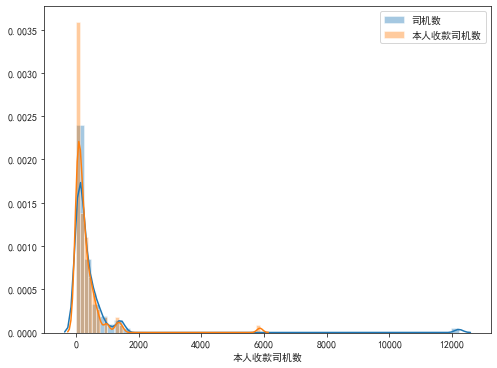

In [215]:
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['司机数'])
sb.distplot(df['本人收款司机数'])
ax.legend(labels=['司机数', '本人收款司机数'])
plt.show()

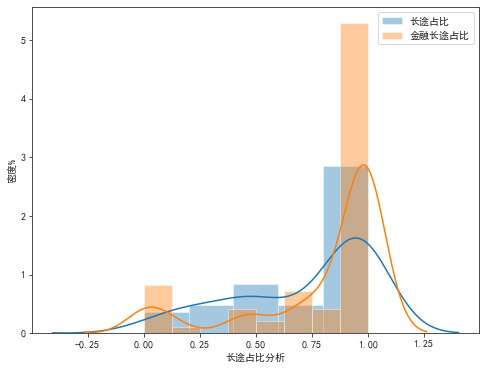

In [246]:
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['长途占比'])
sb.distplot(df['金融长途占比'])
ax.legend(labels=['长途占比', '金融长途占比'])
plt.xlabel('长途占比分析')
plt.ylabel('密度%')
plt.show()

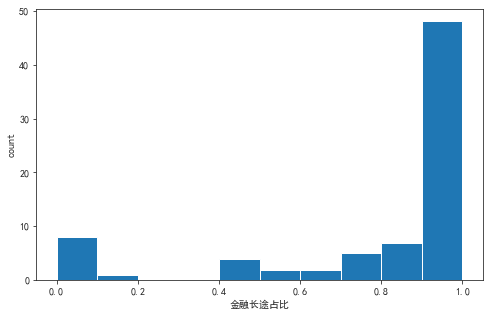

In [250]:
#长途占比	金融长途占比
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x = '金融长途占比')
plt.xlabel(u'金融长途占比');
plt.ylabel(u'count');

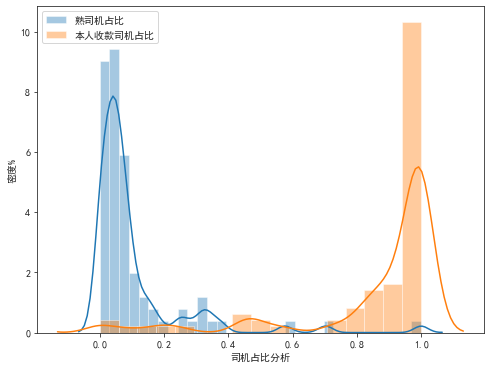

In [255]:
#熟司机占比	本人收款司机占比
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['熟司机占比'])
sb.distplot(df['本人收款司机占比'])
ax.legend(labels=['熟司机占比', '本人收款司机占比'])
plt.xlabel('司机占比分析')
plt.ylabel('密度%')
plt.show()

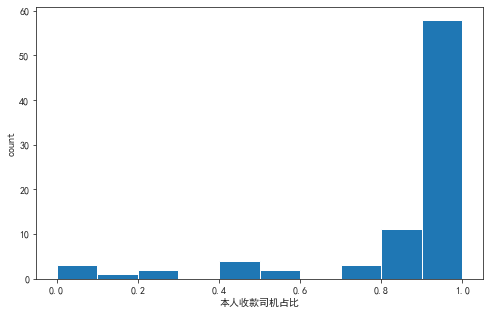

In [257]:
#熟司机占比	本人收款司机占比
plt.figure(figsize=[8, 5])
plt.hist(data = df,  x = '本人收款司机占比')
plt.xlabel(u'本人收款司机占比');
plt.ylabel(u'count');

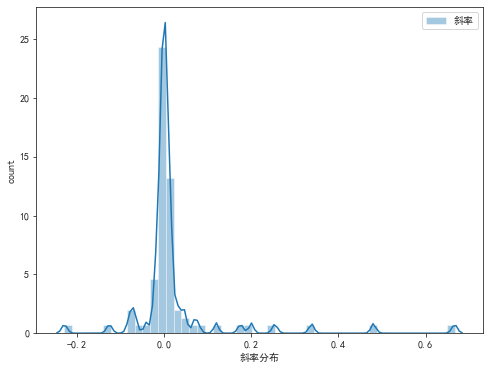

In [135]:
import seaborn as sb

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
sb.distplot(df['斜率'])
ax.legend(labels=['斜率'])
plt.xlabel('斜率分布')
plt.ylabel('count')
plt.show()

In [142]:
df = pd.read_excel(path,sheet_name='周',dtype = {'供应链金融开通时间':'datetime64','供应链金融激活时间':'datetime64'})

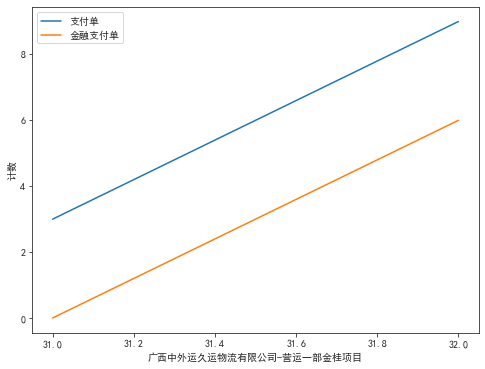

In [143]:
fig, ax = plt.subplots(figsize=(8,6))
df[df['企业ID']==8462669].plot('周时间', '支付单', legend=True, ax=ax)
df[df['企业ID']==8462669].plot('周时间', '金融支付单', legend=True, ax=ax)
plt.xlabel('广西中外运久运物流有限公司-营运一部金桂项目')
plt.ylabel('计数')
plt.show() 

In [ ]:
8262539	广东盛丰物流有限公司	2019/8/5 15:14:57	2020/6/4 15:04:16	活跃	8262539	179	92	0.078127
8379078	招商局物流集团宁波有限公司--雅迪项目HL	2019/12/18 17:39:57	2020/5/19 16:36:47	活跃	8379078	196	141	0.068788
8262447	厦门盛丰物流有限公司泉州分公司	2019/8/14 16:18:55	2019/8/17 9:42:30	活跃	8262447	92	6	0.046914



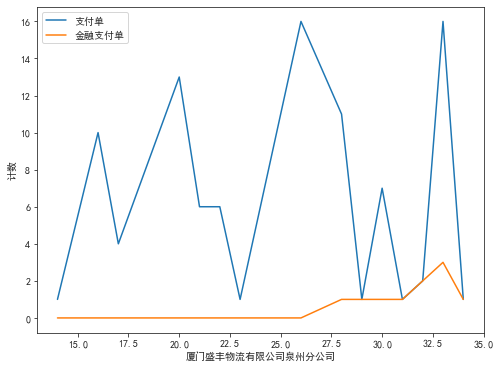

In [161]:
fig, ax = plt.subplots(figsize=(8,6))
df[df['企业ID']==8262447].plot('周时间', '支付单',legend=True, ax=ax)
df[df['企业ID']==8262447].plot('周时间', '金融支付单',legend=True, ax=ax)
plt.xlabel('厦门盛丰物流有限公司泉州分公司')
plt.ylabel('计数')
plt.show() 

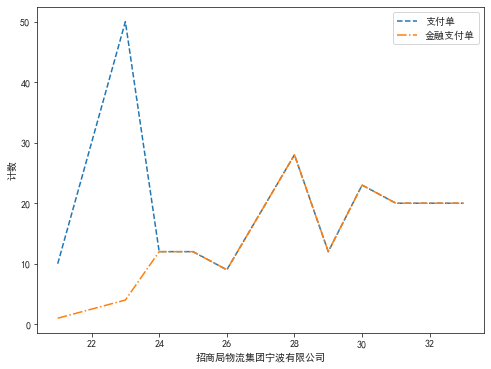

In [159]:
fig, ax = plt.subplots(figsize=(8,6))
df[df['企业ID']==8379078].plot('周时间', '支付单', ls='--',legend=True, ax=ax)
df[df['企业ID']==8379078].plot('周时间', '金融支付单',ls='-.',legend=True, ax=ax)
plt.xlabel('招商局物流集团宁波有限公司')
plt.ylabel('计数')
plt.show() 

In [ ]:
376995	广西中外运久运物流有限公司--营运一部（新）	020/7/28 17:33:19	活跃	376995	84	11	-0.065823
376991	广西中外运久运物流有限公司--钦州营运部（新）		2020/8/7 12:41:48	沉默	376991	101	8	-0.08
8262432	盛丰物流集团有限公司莆田分公司 2020/7/27 15:23:00	活跃	8262432	70	4	-0.227941
8362941	招商局物流集团（扬州）有限公司---牧羊项目		2020/4/30 14:42:29	暂停	8362941	657	201	-0.069007
8644274	德邦(上海)有限公司郑州分公司-大票(河南)	2020/5/3 16:38:29	暂停	8644274	226	10	-0.074713
8650877	德邦（海南）运输有限公司-大票		2020/6/19 10:07:25	暂停	8650877	3	1	-0.125

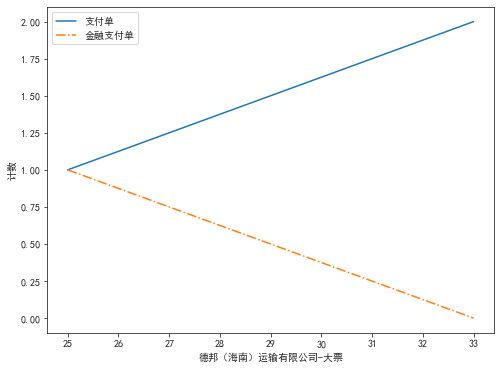

In [168]:
fig, ax = plt.subplots(figsize=(8,6))
df[df['企业ID']==8650877].plot('周时间', '支付单',legend=True, ax=ax)
df[df['企业ID']==8650877].plot('周时间', '金融支付单',ls='-.',legend=True, ax=ax)
plt.xlabel('德邦（海南）运输有限公司-大票')
plt.ylabel('计数')
plt.show()

In [138]:
numeric_vars = ['斜率','支付单','金融支付单','到付金融支付单','金融支付金额','支付金额','预付金使用金额','到付金使用金额','提前收款运单数',
                '司机提前收款金额','金融运单占比','金融支付金额占比','提前收款运单占比','提前收款支付金额占比','支付周','金融支付周期','非金融支付周期',
                '平均支付金额','平均金融支付金额','长途占比','金融长途占比','熟司机占比','本人收款司机占比']


In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
#8366102,8379078,8658077
df[df['新企业ID']==8366102].plot('周时间', '金融运单占比', legend=True, ax=ax)
df[df['新企业ID']==8379078].plot('周时间', '金融运单占比', legend=True, ax=ax)
df[df['新企业ID']==8658077].plot('周时间', '金融运单占比', legend=True, ax=ax)
plt.xticks([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]);

ax.legend(labels=['福建盛丰物流集团宁德分公司', '招商局物流集团宁波有限公司--雅迪项目HL', '招商局物流集团宁波有限公司--雅迪项目HL'])

## 上线周数据分析

In [300]:
path = r'C:\Users\Administrator\Desktop\上线金融项目分析\上线周数据.xlsx'
df = pd.read_excel(path)

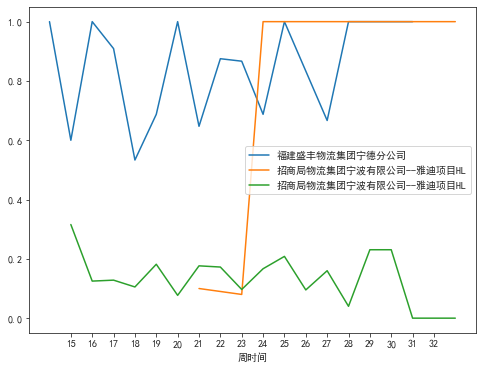

In [362]:
fig, ax = plt.subplots(figsize=(8,6))
#8366102,8379078,8658077
df[df['新企业ID']==8366102].plot('周时间', '金融运单占比', legend=True, ax=ax)
df[df['新企业ID']==8379078].plot('周时间', '金融运单占比', legend=True, ax=ax)
df[df['新企业ID']==8658077].plot('周时间', '金融运单占比', legend=True, ax=ax)
plt.xticks([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]);

ax.legend(labels=['福建盛丰物流集团宁德分公司', '招商局物流集团宁波有限公司--雅迪项目HL', '招商局物流集团宁波有限公司--雅迪项目HL'])

In [104]:
df = pd.read_excel(path,sheet_name='周',dtype = {'供应链金融开通时间':'datetime64','供应链金融激活时间':'datetime64'})

In [372]:
import statsmodels

In [374]:
from sklearn import linear_model
import numpy as np
reg = linear_model.LinearRegression()
#假设数据是data
data=[1.71490784773981,2.71490784773981,3.71490784773981,4.71490784773981]
#对应序号是 range(len(data))
reg.fit (np.array(range(len(data))).reshape(-1,1),np.array(data).reshape(-1,1))
#斜率为
print(reg.coef_)
#截距为
print(reg.intercept_)

[[1.]]
[1.71490785]


In [387]:
pd.set_option('display.max_rows', None)  #显示所有行

84

In [103]:
np.array(df1['周时间'])

array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

In [ ]:
#斜率

In [105]:
#每个项目的斜率
idxl = []
for i in df['企业ID'].unique():
    dfi = df[df['企业ID']==i][['企业ID','周时间','金融运单占比','企业名称']].dropna(axis=0)
    df1 = dfi.sort_values(by = ['周时间'])
    reg.fit (np.array(df1['周时间']).reshape(-1,1),np.array(df1['金融运单占比']).reshape(-1,1))
    idxl.append([i,float(reg.coef_[0]),float(reg.intercept_[0])]) 

In [106]:
pd.DataFrame(idxl,columns=['企业ID','斜率','截距'])

,企业ID,斜率,截距
0,376969,0.004173,0.807936
1,524869,0.016773,-0.270548
2,578881,-0.001528,0.065455
3,8262430,0.011366,0.501049
4,8262438,-0.004426,0.753407
5,8262444,0.034521,-0.214854
6,8262447,0.046914,-0.881230
7,8262453,0.006077,0.657504
8,8262458,0.009348,0.672184
9,8262470,0.001080,0.942199


In [401]:
pd.set_option('display.max_rows', None)  #显示所有行
pd.DataFrame(idxl) 

,0,1,2
0,376969,0.002843,0.406907
1,376986,0.089339,-2.693837
2,376991,-0.006890,0.227355
3,376995,-0.081569,2.834783
4,385845,0.000000,1.000000
5,524869,0.002630,-0.041314
6,578881,-0.014419,0.390802
7,650896,0.024368,-0.065861
8,650897,0.282183,-8.449005
9,650898,0.104353,-3.149136


 ### 清洗数据-添加项目编号属性

### 清洗数据-执行者中的名字和邮箱分离成两个维度---执行者，email

In [49]:
df.执行者 = df.执行者.str.extract('([^\w]?[\u4e00-\u9fa5]+[^\w]?[\u4e00-\u9fa5]+\)?)', expand=True)

In [50]:
df['email'] = df.创建者.str.extract('([a-zA-Z0-9-.]+\@[a-zA-Z0-9-.]+)', expand=True)

可视化每个销售的项目数量